In [1]:
!git clone https://github.com/iman2693/CTCB/

Cloning into 'CTCB'...
remote: Enumerating objects: 4225, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 4225 (delta 4), reused 11 (delta 1), pack-reused 4206 (from 1)
Receiving objects: 100% (4225/4225), 196.63 MiB | 26.49 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (5190/5190), done.


In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import collections
from random import choices
from sklearn.metrics import accuracy_score

In [13]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.callbacks import *
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# convert to one-hot-encoding
from tensorflow.keras.utils import to_categorical

# Transfer learning model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import *
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

---------------

Loading Train Dataset:

In [44]:
train_dir = 'CTCB/dataset-processed/Train'
test_dir = 'CTCB/dataset-processed/Test'
Categories = list(os.listdir(train_dir))
Categories

['Anabaena',
 'Planktothrix',
 'Dolichospermum',
 'Raphidiopsis',
 'Microcystis',
 'Oscillatoria',
 'Aphanizomenon',
 'Cylindrospermopsis',
 'Nostoc',
 'Phormidium']

In [45]:
images = {}
images_directory = {}
for dirname in os.listdir(train_dir):
    dir = os.path.join(train_dir, dirname) # Use os.path.join for creating paths
    if os.path.isdir(dir): # Check if it's a directory
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(dir)):
          if 'jpg' in filename or 'png' in filename:
              addr = os.path.join(dir, filename) # Use os.path.join
              image = cv2.imread(addr,0)
              image = image/255.0
              imags.append(image)
              imgs_directory.append(addr)
        images[dirname] = imags
        images_directory[dirname] = imgs_directory

In [46]:
countofallimages = 0
for cls in Categories:
  countofallimages += len(images[cls])

In [47]:
print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories )} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 2073
There are 10 classes
Average number of essential images for each class is = 207


In [48]:
X = []
y = []
X_addr = []
for cls in Categories:
  for img in images[cls]:
    X.append(img)
    y.append(cls)
for cls in Categories:
  for img in images_directory[cls]:
    X_addr.append(img)
y = np.array(y)
X = np.array(X)
X_addr = np.array(X_addr)

In [49]:
counter = collections.Counter(y)
counter

Counter({np.str_('Anabaena'): 268,
         np.str_('Planktothrix'): 104,
         np.str_('Dolichospermum'): 130,
         np.str_('Raphidiopsis'): 5,
         np.str_('Microcystis'): 895,
         np.str_('Oscillatoria'): 157,
         np.str_('Aphanizomenon'): 30,
         np.str_('Cylindrospermopsis'): 23,
         np.str_('Nostoc'): 237,
         np.str_('Phormidium'): 224})

Split Train Dataset to training and validation dataset:

In [50]:
X_train_ind, X_val_ind, y_train, y_val = train_test_split(list(range(y.shape[0])), y, test_size=0.01,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_val_addr = X_addr[X_val_ind]
X_val = X[X_val_ind]

In [51]:
counter = collections.Counter(y_val)
counter

Counter({np.str_('Microcystis'): 12,
         np.str_('Planktothrix'): 4,
         np.str_('Anabaena'): 1,
         np.str_('Nostoc'): 3,
         np.str_('Aphanizomenon'): 1})

----------------------

Loading Test DataSet:

In [60]:
images = {}
images_directory = {}
for dirname in os.listdir(test_dir):
    dir = os.path.join(test_dir, dirname)
    if os.path.isdir(dir):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(dir)):
          if 'jpg' in filename or 'png' in filename:
              addr = dir+"/"+filename
              image = cv2.imread(addr,0)
              image = image/255.0
              imags.append(image)
              imgs_directory.append(addr)
        images[dirname] = imags


In [61]:
X_test = []
y_test = []
X_test_addr = []
for cls in Categories:
    print (images)
#   for img in images[cls]:
#     X_test.append(img)
#     y_test.append(cls)
# for cls in Categories:
#   for img in images_directory[cls]:
#     X_test_addr.append(img)
# y_test = np.array(y_test)
# X_test = np.array(X_test)
# X_test_addr = np.array(X_test_addr)

A saída de streaming foi truncada nas últimas 5000 linhas.
       [0.78431373, 0.78431373, 0.78431373, ..., 0.78431373, 0.78431373,
        0.78431373]]), array([[0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412],
       [0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412],
       [0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412],
       ...,
       [0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412],
       [0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412],
       [0.63529412, 0.63529412, 0.63529412, ..., 0.63529412, 0.63529412,
        0.63529412]]), array([[0.77254902, 0.77254902, 0.77254902, ..., 0.77254902, 0.77254902,
        0.77254902],
       [0.77254902, 0.77254902, 0.77254902, ..., 0.77254902, 0.77254902,
        0.77254902],
       [0.77254902, 0.77254902, 0.77254902, ..., 0.77254902, 0.77254902,
      

In [62]:
counter = collections.Counter(y_test)
counter

Counter()

In [63]:
del images
del images_directory
del X
del X_val_addr
del y

------------------

Data Augmentation:

In [64]:
def generateimage(img,y,count):
    new_X_train = []
    new_y_train = []
    i = 0
    y = np.array(y).reshape((1,))

    flow = demo_datagen.flow(img.reshape((1,img.shape[0],img.shape[1],1)),y, batch_size=12)
    for batch,ind in flow:
        if i>=count:
            break
        new_X_train.append(batch.reshape((batch.shape[1],batch.shape[2])))
        new_y_train.append(ind[0])
        i+=1
    new_X_train = np.array(new_X_train)
    new_y_train = np.array(new_y_train)
    return new_X_train,new_y_train

In [65]:
def preprocessing(X_train,y_train,downsampling=True,upsampling=True):
  new_X = []
  new_y = []
  new_X_addr = []
  counter = collections.Counter(y_train)
  for cls in Categories:
    print(cls)
    if counter[cls] > np.round(np.mean(list(counter.values()))) :
      select_prob = (np.round(np.mean(list(counter.values()))) /counter[cls]) +0.3
      for ind , x in enumerate(X_train):
        if y_train[ind] == cls:
            if downsampling:
                choise = choices([1,0], [select_prob,1-select_prob])
                if choise==[1]:
                    new_X.append(x)
                    new_y.append(cls)
                    new_X_addr.append(X_train_addr[ind])
            else:
                new_X.append(x)
                new_y.append(cls)
                new_X_addr.append(X_addr[ind])



    if counter[cls] < np.round(np.mean(list(counter.values()))):
      if upsampling:
        generate_number = int(np.round(np.round(np.mean(list(counter.values()))) /counter[cls]))
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            n_x,n_y = generateimage(x ,y_train[ind],generate_number)
            for xx in n_x:
                new_X.append(xx)
                new_y.append(cls)
                new_X_addr.append(X_train_addr[ind])
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])
      else:
        for ind , x in enumerate(X_train):
          if y_train[ind] == cls:
            new_X.append(x)
            new_y.append(cls)
            new_X_addr.append(X_train_addr[ind])


  new_X = np.array(new_X)
  new_y = np.array(new_y)
  new_X_addr = np.array(new_X_addr)
  return new_X,new_y,new_X_addr

In [66]:
demo_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    #rescale=1./255,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True
)

In [67]:
new_X_train, new_y_train, new_X_addr = preprocessing(X_train,y_train,downsampling=True,upsampling=True)

Anabaena
Planktothrix
Dolichospermum
Raphidiopsis
Microcystis
Oscillatoria
Aphanizomenon
Cylindrospermopsis
Nostoc
Phormidium


In [68]:
counter = collections.Counter(new_y_train)
counter

Counter({np.str_('Anabaena'): 267,
         np.str_('Planktothrix'): 300,
         np.str_('Dolichospermum'): 390,
         np.str_('Raphidiopsis'): 210,
         np.str_('Microcystis'): 476,
         np.str_('Oscillatoria'): 314,
         np.str_('Aphanizomenon'): 232,
         np.str_('Cylindrospermopsis'): 230,
         np.str_('Nostoc'): 234,
         np.str_('Phormidium'): 224})

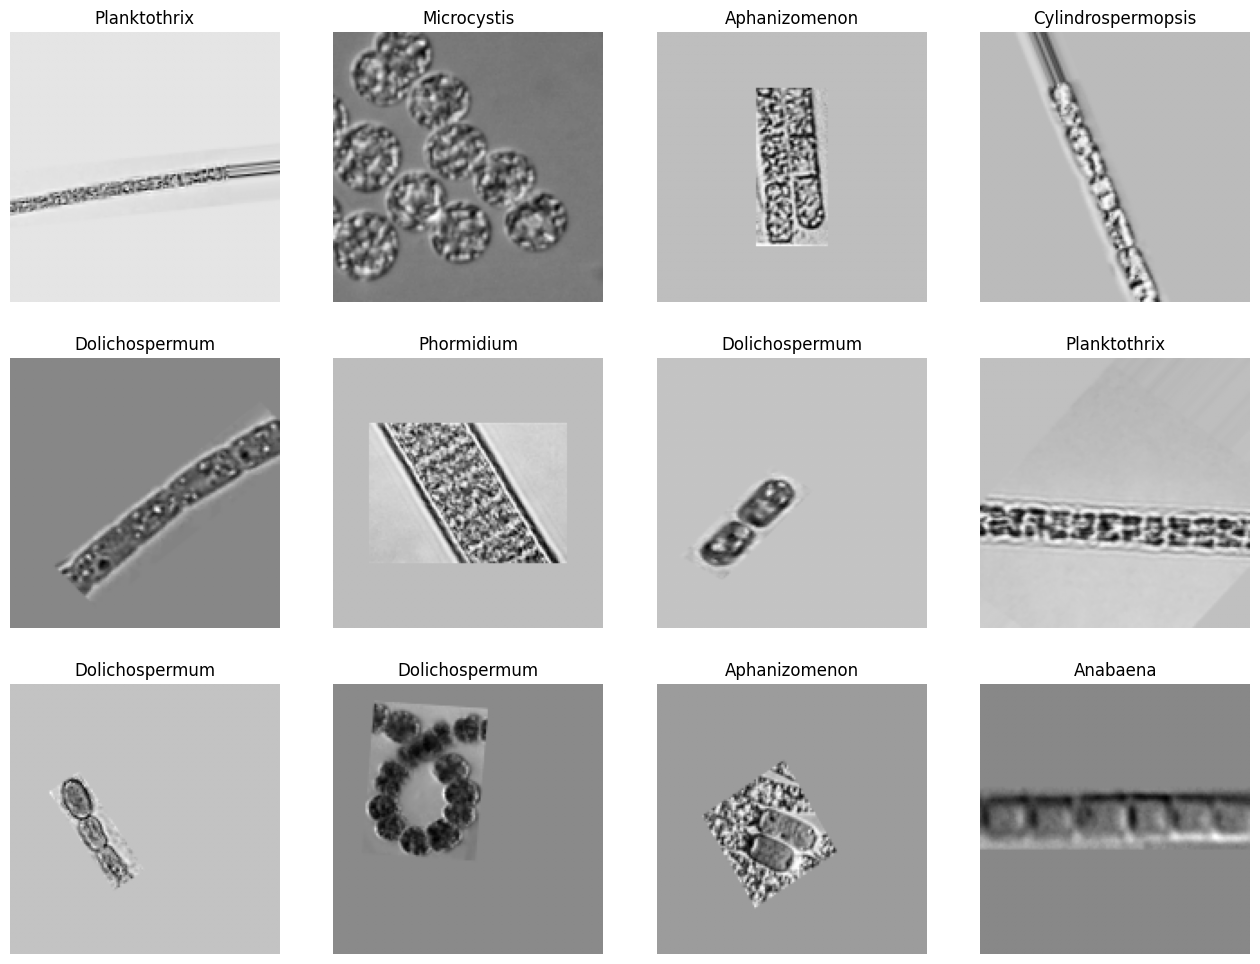

In [69]:
plt.figure(figsize=(16,12))
for n , i in enumerate(list(np.random.randint(0,len(new_X_train),12))) :
  plt.subplot(3,4,n+1)
  plt.imshow(new_X_train[i],cmap="gray")
  plt.axis('off')
  plt.title(new_y_train[i])

In [70]:
del X_train
del y_train

In [71]:
def Gray3channel(X):
  listt = []
  for i,x in enumerate(X):
    listt.append(cv2.merge([x,x,x]))
  return np.array(listt)

In [72]:
Gray3channel(new_X_train).shape

(2877, 150, 150, 3)

In [73]:
def ReshapeGrey(X):
  return X.reshape((X.shape[0],X.shape[1],X.shape[2],1))

In [74]:
ReshapeGrey(new_X_train).shape

(2877, 150, 150, 1)

In [75]:
encoder = LabelEncoder()
encoder.fit(new_y_train)
encoded_labels_train = encoder.transform(new_y_train)
encoded_labels_test = encoder.transform(y_test)
encoded_labels_val = encoder.transform(y_val)

OneHot_labels_train = to_categorical(encoded_labels_train,num_classes=len(Categories))
OneHot_labels_test = to_categorical(encoded_labels_test,num_classes=len(Categories))
OneHot_labels_val = to_categorical(encoded_labels_val,num_classes=len(Categories))

In [76]:
new_y_train

array(['Anabaena', 'Anabaena', 'Anabaena', ..., 'Phormidium',
       'Phormidium', 'Phormidium'], dtype='<U18')

In [77]:
OneHot_labels_train.shape

(2877, 10)

------------------

In [78]:
def labelwithoutput(output):
  listt = []
  for o in output:
    listt.append(np.argmax(o))
  return np.array(listt)

# **Model 2 - MobileNetV2**

In [79]:
model =MobileNetV2(input_shape = (150, 150, 3),include_top = False, weights = 'imagenet')
for layer in model.layers[0:len(model.layers)-60]:
     layer.trainable = False
model_output = GlobalAveragePooling2D()(model.output)
model_output = Dense(32, activation='relu')(model_output)
model_output = Dense(16, activation='relu')(model_output)
model_output = Dense(10, activation='softmax')(model_output)
model=Model(inputs=[model.input],outputs=model_output)
model.summary()

/tmp/ipython-input-79-3426401234.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model =MobileNetV2(input_shape = (150, 150, 3),include_top = False, weights = 'imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,299,674 (8.77 MB)

 Trainable params: 1,997,402 (7.62 MB)

 Non-trainable params: 302,272 (1.15 MB)

In [80]:
def scheduler(epoch, lr):
	if epoch < 5:
		return lr
	else:
		return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [82]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
filepath = 'callback.h5'
checkpoint = ModelCheckpoint(filepath,
                                monitor = 'val_loss',
                                save_best_only=True,
                                verbose = 1)
model.compile(optimizer = opt,
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

history = model.fit(Gray3channel(new_X_train),OneHot_labels_train, validation_data = (Gray3channel(X_val), OneHot_labels_val),epochs = 40,callbacks=[callback,checkpoint],verbose = 1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9377 - loss: 0.0428

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)



Epoch 1: val_loss improved from inf to 1.47018, saving model to callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.9376 - loss: 0.0428 - val_accuracy: 0.6190 - val_loss: 1.4702 - learning_rate: 0.0010
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9422 - loss: 0.0379
Epoch 2: val_loss did not improve from 1.47018
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9422 - loss: 0.0379 - val_accuracy: 0.6190 - val_loss: 2.1371 - learning_rate: 0.0010
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9660 - loss: 0.0225
Epoch 3: val_loss improved from 1.47018 to 1.34100, saving model to callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9659 - loss: 0.0225 - val_accuracy: 0.3333 - val_loss: 1.3410 - learning_rate: 0.0010
Epoch 4/40
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9628 - loss: 0.0216
Epoch 4: val_loss improved from 1.34100 to 1.25409, saving model to callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9627 - loss: 0.0216 - val_accuracy: 0.6190 - val_loss: 1.2541 - learning_rate: 0.0010
Epoch 5/40
89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9782 - loss: 0.0168
Epoch 5: val_loss improved from 1.25409 to 0.89582, saving model to callback.h5


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9780 - loss: 0.0169 - val_accuracy: 0.6190 - val_loss: 0.8958 - learning_rate: 0.0010


ValueError: The output of the `schedule` function should be a float. Got: 0.0009048373904079199

In [83]:

vggmodel.load_weights('callback.h5')
# vggmodel.load_weights('/content/gdrive/MyDrive/Cyano/mobilev2-92perfect.h5')

NameError: name 'vggmodel' is not defined

In [ ]:
test_Loss, test_Acc = model.evaluate(Gray3channel(X_test),OneHot_labels_test)
print('Test Loss:', test_Loss)
print('Test Accuracy :', test_Acc)
Y_pred = model.predict(Gray3channel(X_test))
Y_pred = encoder.inverse_transform(labelwithoutput(Y_pred))
print(classification_report(y_test, Y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Y_pred))
disp.plot()
#plt.savefig("/content/gdrive/MyDrive/Cyano/test6 (Xception).svg")
plt.show()

In [ ]:
new_layer = Flatten()(model.layers[-5].output)
intermediate_layer_model = Model(inputs=model.input,
                                       outputs=new_layer)
intermediate_output_train = intermediate_layer_model.predict(Gray3channel(new_X_train))
intermediate_output_test = intermediate_layer_model.predict(Gray3channel(X_test))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(intermediate_output_train)
X_new = pca.transform(intermediate_output_train)
X_test_new = pca.transform(intermediate_output_test)

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
xgb_cl.fit(X_new, new_y_train)
Y_pred = xgb_cl.predict(X_test_new)
accuracy_score(y_test, Y_pred)
print(classification_report(y_test, Y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=0)
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
accuracy_score(y_test, Y_pred)
print(classification_report(y_test, Y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_new, new_y_train)
Y_pred = neigh.predict(X_test_new)
accuracy_score(y_test, Y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
accuracy_score(y_test, Y_pred)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_new, new_y_train)
Y_pred = clf.predict(X_test_new)
print(accuracy_score(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

In [ ]:
#model.save_weights('/content/gdrive/MyDrive/Cyano/mobilev2-92perfect.h5')

-----------------------------